# Project Summary

This project, titled "Line Graphs with different Libraries," is a data visualization tutorial presented in a Jupyter notebook. The notebook demonstrates how to create and customize line graphs and scatter plots using popular Python libraries like Numpy, Pandas, Matplotlib, and Seaborn. The project also includes a section on how to export these visualizations. The project uses a car dataset as an example to illustrate how line graphs are effective for visualizing trends over time, such as the evolution of engine horsepower.

# Line Graphs with different Libraries

A line graph is a type of chart that displays information as a series of points connected by straight lines, typically used to show trends or changes over time. We choose a line graph when we want to visualize how a variable evolves, because it makes patterns and trends easy to see. For example, in my dataset of cars, plotting the average horsepower against the model year using a line graph allows me to see how engine power has changed over time, revealing trends such as increases or decreases across different decades. By sorting the data by year and averaging horsepower, the line graph provides a clear and continuous view of the overall trend rather than the scattered values of individual cars.

In [2]:
import numpy as np

In [4]:
X = np.arange(0, 100)
Y = np.random.randint(0, 200, size=X.shape[0])

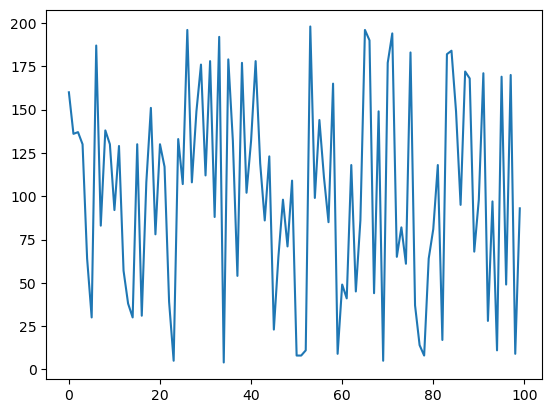

In [5]:
#Plot the data using matplotlib pyplot interface
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, Y)

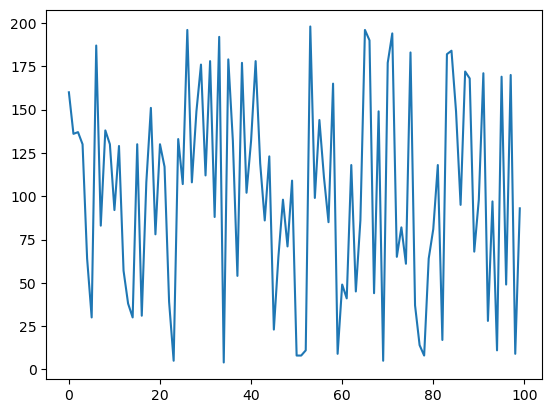

In [7]:
#Plot by using panadas dataframe
import pandas as pd
df = pd.DataFrame({"x": X, "y_col":Y})
plt.plot("x", "y_col", data=df)

<Axes: xlabel='x', ylabel='y_col'>

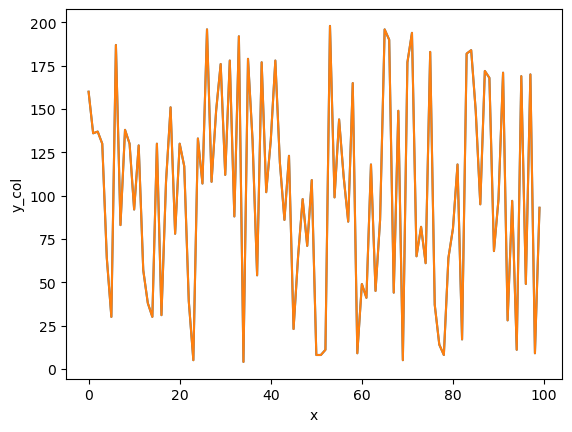

In [11]:
#Plot by using Seaborn
import seaborn as sns
sns.lineplot(x=X, y=Y)
sns.lineplot(x="x", y="y_col", data=df)


[]

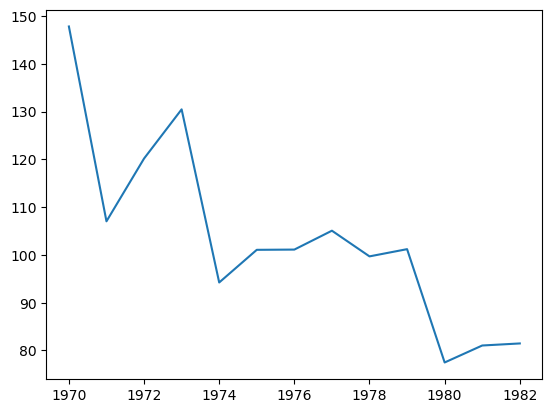

In [63]:
#Pandas dataframes and grouped Data and OOP

url = "https://raw.githubusercontent.com/TrainingByPackt/Big-Data-Analysis-with-Python/master/Lesson02/Dataset/auto-mpg.data"
cols = [
    "mpg","cylinders","displacement","horsepower",
    "weight","acceleration","year","origin","name"
]
df = pd.read_csv(url, sep=r"\s+", names=cols, na_values="?")
df.isna().sum()
df = df.dropna(subset = "horsepower")

df_clean = df.copy()
df_clean["full_year"] = df_clean["year"].astype(int) + 1900
df_clean["full_year"].head()

hr_by_year = df_clean.groupby("full_year", as_index=False)["horsepower"].mean()
hr_by_year = hr_by_year.sort_values("full_year")

plt.plot(hr_by_year["full_year"], hr_by_year["horsepower"])
plt.plot()

# Scatter Plots

A scatter plot is a type of graph that displays individual data points on a two-dimensional plane, showing the relationship between two variables. I chose a scatter plot because it allows me to see how each car’s horsepower varies with the model year in my dataset, highlighting patterns, trends, and outliers that might be hidden in a line graph. For example, by plotting full_year on the x-axis and horsepower on the y-axis from the Auto MPG dataset, I can clearly observe how horsepower differs among cars within the same year and across different years, giving me a better understanding of the spread and distribution of the data.

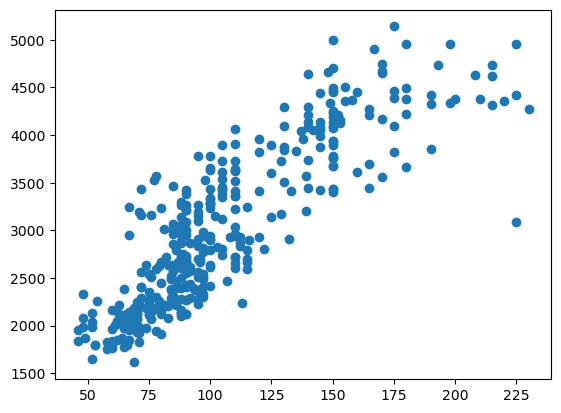

In [70]:
#Using Matplotlib
df_clean = df_clean.sort_values("full_year")

fig, ax = plt.subplots()
ax.scatter(x= df_clean["horsepower"], y= df_clean["weight"])

<Axes: xlabel='horsepower', ylabel='weight'>

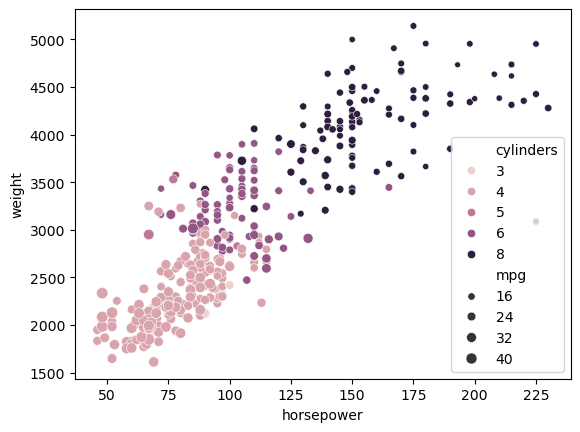

In [72]:
# Using Seaborn
sns.scatterplot(data=df, x="horsepower", y="weight", hue="cylinders", size="mpg")

<Axes: xlabel='horsepower', ylabel='weight'>

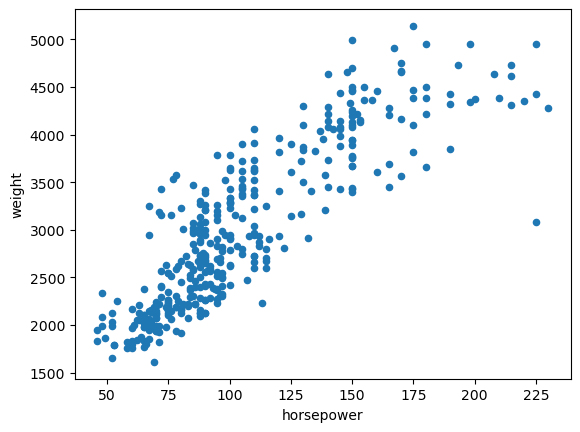

In [75]:
#by using Panda's kind parameter
df.plot(kind="scatter", x="horsepower", y="weight")

# Histogram

A histogram is a graphical representation that shows the distribution of a numerical variable by dividing the data into intervals, or “bins,” and counting how many values fall into each bin. We use a histogram to quickly understand patterns in the data, such as whether it is skewed, has outliers, or is normally distributed, which helps in making informed decisions for analysis or modeling. For example, using the Auto MPG dataset, we can create a histogram of the horsepower column to see how car engine power is distributed across different vehicles, revealing whether most cars have moderate horsepower or if extreme values are common. This visual insight can guide further analysis, such as comparing horsepower trends over the years or identifying unusual cars in the dataset.

<Axes: ylabel='Frequency'>

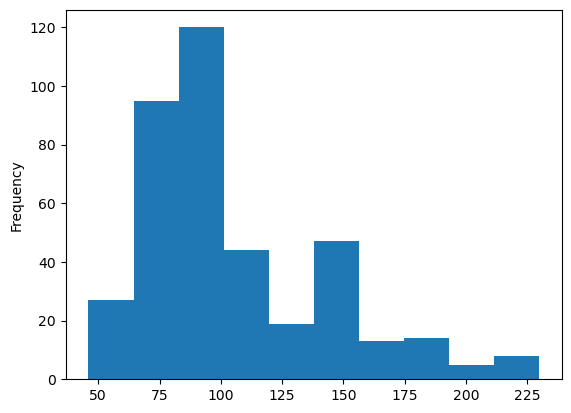

In [78]:
# By using pandas's kind
df.horsepower.plot(kind="hist")


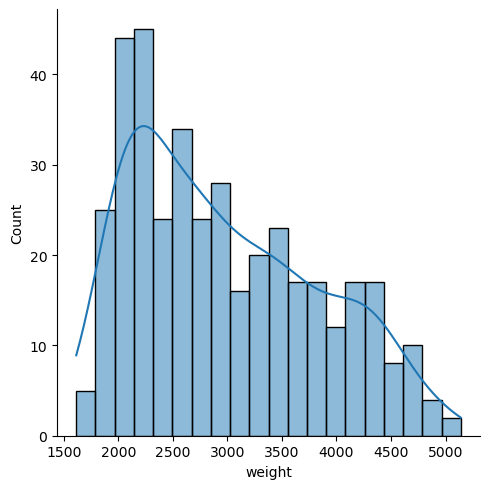

In [84]:
sns.displot(df["weight"], bins=20, kde=True)
plt.show()

# Boxplots

A boxplot is a simple way to visualize the distribution of a dataset and quickly see its spread, median, and potential outliers. It shows the minimum, first quartile, median, third quartile, and maximum values, and any points that lie far outside this range are marked as outliers. For example, using the Auto MPG dataset, we can create a boxplot of horsepower to see how it varies across different car years: sns.boxplot(data=df_clean, x="cylinders", y="horsepower"). This plot immediately reveals which years had cars with unusually high or low horsepower, highlights the typical range of values, and helps identify extreme outliers, giving us an intuitive understanding of variation and central tendency in real-world data.

<Axes: xlabel='cylinders', ylabel='horsepower'>

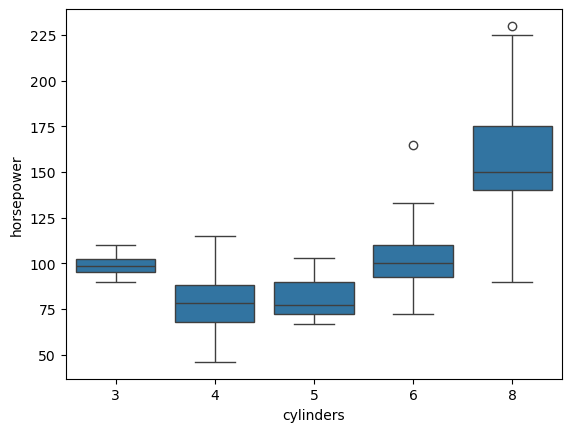

In [85]:
# By Using Seaborn
sns.boxplot(data=df_clean, x="cylinders", y="horsepower")

<Axes: title={'center': 'horsepower'}, xlabel='cylinders'>

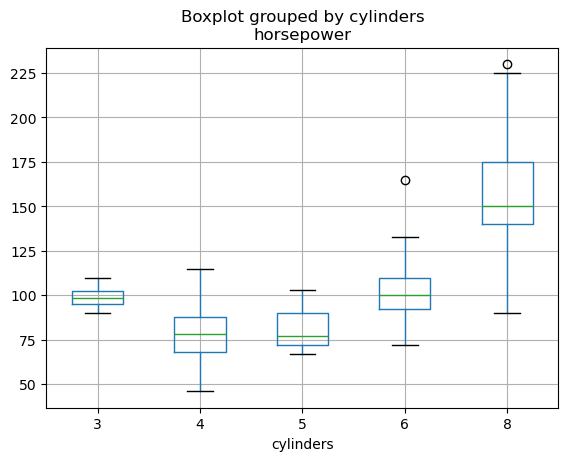

In [86]:
#By using pandas
df_clean.boxplot(column="horsepower", by="cylinders")

# Different Between Matplotlib and Seaborn

Matplotlib is a powerful and flexible library for creating almost any type of plot in Python, but it often requires writing more code to customize the look and style of your charts. Seaborn, on the other hand, is built on top of Matplotlib and is designed to make statistical visualizations easier and more attractive with less code. For example, if I want to plot the trend of horsepower over full_year in the Auto MPG dataset, I could use Matplotlib with plt.plot(hp_by_year["full_year"], hp_by_year["horsepower"]), but with Seaborn, I can simply write sns.lineplot(data=df_clean, x="full_year", y="horsepower", estimator="mean") and it automatically calculates averages, adds confidence intervals, and gives a cleaner, more polished appearance. Essentially, Matplotlib gives me complete control, while Seaborn provides smarter defaults and easier styling for statistical insights.

# Changing the plot designs

[]

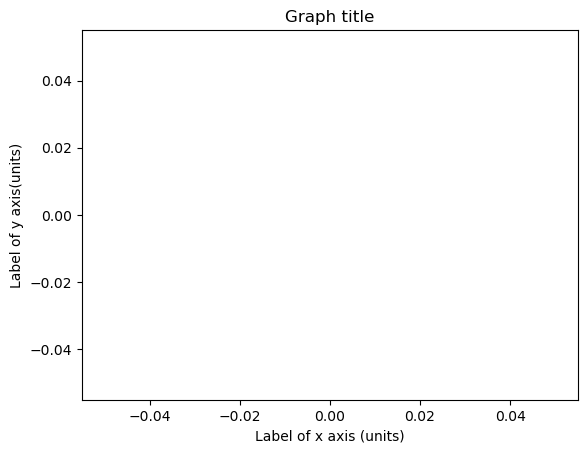

In [91]:
# Title and label Configuration for Axis Objects

fig, ax = plt.subplots()
ax.set(title="Graph title", xlabel="Label of x axis (units)", ylabel="Label of y axis(units)")
ax.plot()

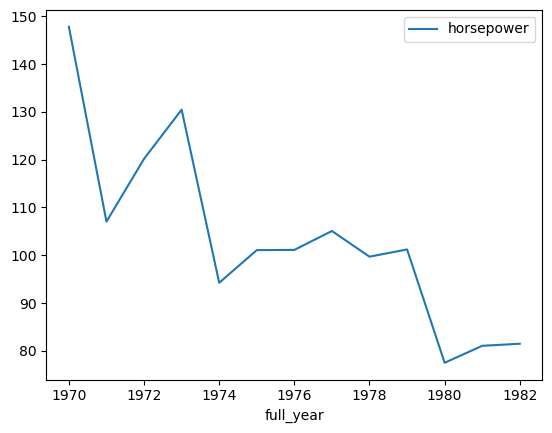

In [94]:
# Usinf legend
fig, ax = plt.subplots()
df_clean.groupby("full_year")["horsepower"].mean().plot(ax=ax, label="horsepower")
ax.legend()

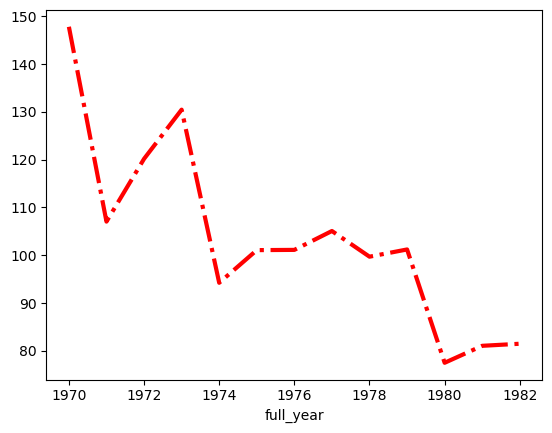

In [95]:
# Line Style and colors
df_clean.groupby("full_year")["horsepower"].mean().plot(ls="-.", color="r", lw=3)
ax.legend()

<Axes: xlabel='weight', ylabel='horsepower'>

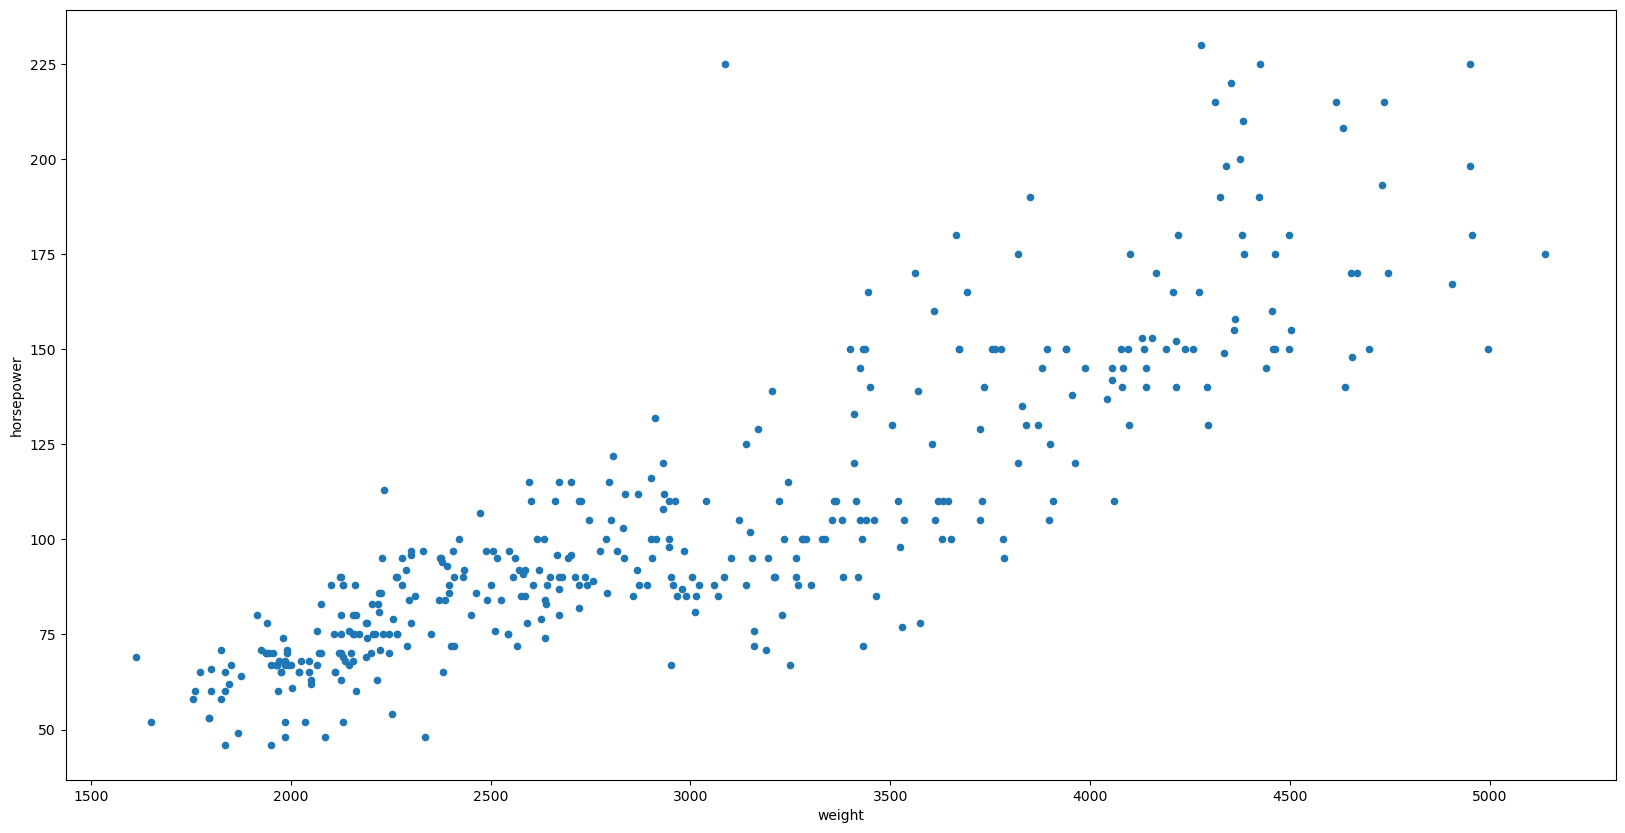

In [96]:
# Figure Size
df_clean.plot(kind="scatter", x="weight", y="horsepower", figsize=(20, 10))

In [98]:
# Using Matplotlib Style Sheets
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='weight', ylabel='horsepower'>

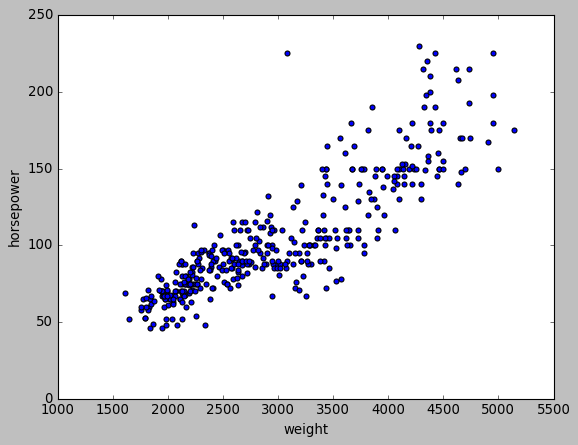

In [99]:
# Creating a scatter plot using classic
plt.style.use(["classic"])
df.plot(kind="scatter", x="weight", y="horsepower")

<Axes: xlabel='weight', ylabel='horsepower'>

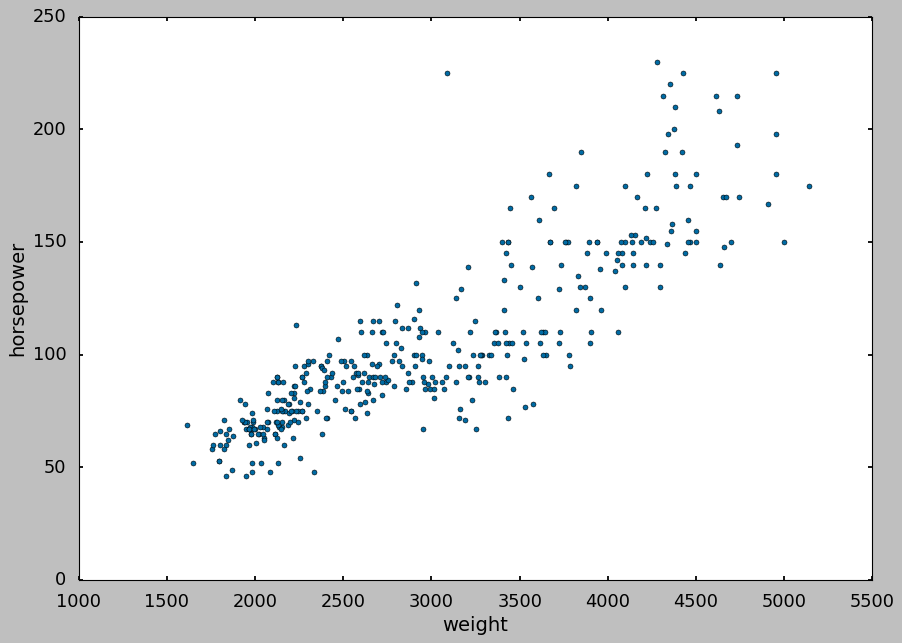

In [101]:
plt.style.use(["tableau-colorblind10"])
df.plot(kind="scatter", x="weight", y="horsepower")

# Exporting Graphs


In [103]:
fig.savefig("horsepower_weight_scatter.jpg")